Generated Exam Scores: [67 64 73 75 71 68 73 65 67 70 63 67]

Sample Mean: 68.58
Hypothesized Mean: 65
t-statistic: 3.2454
Degrees of Freedom: 11
p-value: 0.0078

95% Confidence Interval: (66.15, 71.01)

Decision: Reject H0 (The sample mean is significantly different from 65)


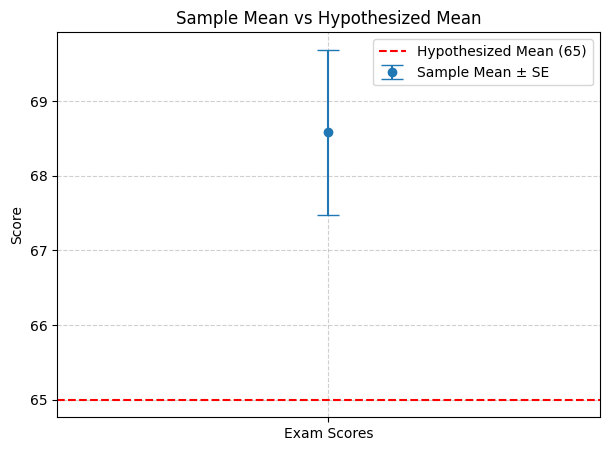

In [3]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# -----------------------------
# Step 1: Dataset Generation
# -----------------------------

# Replace this with your last two digits of phone/student ID
k = 56   # Example: if ID ends with 56

# Generate dataset as per given rule
# Formula: exam scores = 60 + randint(0, 15, size=12) + (k % 5)
np.random.seed(42)  # for reproducibility
exam_scores = 60 + np.random.randint(0, 15, size=12) + (k % 5)

# Display dataset
print("Generated Exam Scores:", exam_scores)

# -----------------------------
# Step 2: State Hypothesis
# -----------------------------
# H0: μ = 65 (population mean is 65)
# H1: μ ≠ 65 (population mean is different from 65)

hypothesized_mean = 65

# -----------------------------
# Step 3: Perform One-Sample t-test
# -----------------------------
t_stat, p_value = stats.ttest_1samp(exam_scores, hypothesized_mean)

sample_mean = np.mean(exam_scores)
sample_std = np.std(exam_scores, ddof=1)  # sample standard deviation
n = len(exam_scores)
df = n - 1  # degrees of freedom

print("\nSample Mean:", round(sample_mean, 2))
print("Hypothesized Mean:", hypothesized_mean)
print("t-statistic:", round(t_stat, 4))
print("Degrees of Freedom:", df)
print("p-value:", round(p_value, 4))

# -----------------------------
# Step 4: Confidence Interval (95%)
# -----------------------------
confidence = 0.95
alpha = 1 - confidence
ci_low, ci_high = stats.t.interval(confidence, df, loc=sample_mean, scale=stats.sem(exam_scores))

print("\n95% Confidence Interval: ({:.2f}, {:.2f})".format(ci_low, ci_high))

# -----------------------------
# Step 5: Decision Rule
# -----------------------------
alpha = 0.05
if p_value < alpha:
    decision = "Reject H0 (The sample mean is significantly different from 65)"
else:
    decision = "Fail to Reject H0 (The sample mean is not significantly different from 65)"

print("\nDecision:", decision)

# -----------------------------
# Step 6: Visualization
# -----------------------------
plt.figure(figsize=(7,5))
plt.errorbar(1, sample_mean, yerr=stats.sem(exam_scores), fmt='o', capsize=8, label='Sample Mean ± SE')
plt.axhline(y=hypothesized_mean, color='r', linestyle='--', label='Hypothesized Mean (65)')
plt.xlim(0, 2)
plt.xticks([1], ['Exam Scores'])
plt.ylabel('Score')
plt.title('Sample Mean vs Hypothesized Mean')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()